In [1]:
import scipy as sci
import numpy as np
import location as lc

In [37]:
stopTop = lc.BusStop(0,0.01,'top-stop001',[],0,0)
stopMid = lc.BusStop(0,0,'mid-stop001',[],0,0)
stopBot = lc.BusStop(0,-0.01,'bot-stop001',[],0,0)

areaTop1 = lc.Block(0.005, 0.01, 'top-area001', 100, 100, [])
areaTop2 = lc.Block(-0.005, 0.01, 'top-area002', 100, 100, [])

areaMid1 = lc.Block(0.005, 0, 'mid-area001', 100, 100, [])
areaMid2 = lc.Block(-0.005, 0, 'mid-area002', 100, 100, [])

areaBot1 = lc.Block(0.005, -0.01, 'bot-area001', 100, 100, [])
areaBot2 = lc.Block(-0.005, -0.01, 'bot-area002', 100, 100, [])

In [61]:
stops = [stopTop, stopMid, stopBot]
areas = [areaTop1, areaTop2, areaMid1, areaMid2, areaBot1, areaBot2]

# populate area neighborhood with nearby stops
for area in areas:
    area.findNeighbors(stops, 0.6)
#     print(area,area.neighborhood)

for stop in stops:
    stop.findNeighbors(areas, 0.6)
#     print(stop,stop.neighborhood)

for stop in stops:
    stop.findCompetitors(stops, 1.2)
#     print(stop.competitors)



busStop id:top-stop001 [block id:top-area001, block id:top-area002]
busStop id:mid-stop001 [block id:mid-area001, block id:mid-area002]
busStop id:bot-stop001 [block id:bot-area001, block id:bot-area002]


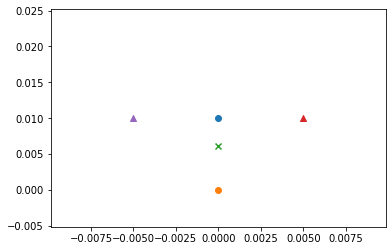

In [146]:
from scipy.optimize import minimize
from scipy.optimize import NonlinearConstraint
import geopy
from matplotlib import pyplot as plt


def dist(set1, set2):
    """ Measrue geodesic distance in kilometers between to pairs of coordinates."""
    return geopy.distance.distance(set1,set2).km


def f(t, stopA, stopB):
    """ A function of a variable t. A segment from stopA to stopB"""
    lat = (stopB.lat - stopA.lat)*t + stopA.lat
    long = (stopB.long - stopA.long)*t + stopA.long
    return (lat,long)

STOP_TO_MOVE = stopTop
STOP_REMOVED = stopMid

def constraint_func(t):
    """ returns an array of non lin constrains. 
    STOP_TO_MOVE, STOP_REMOVED need to be globally defined """
    A = []
    
    for area in STOP_TO_MOVE.neighborhood:
        A.append(dist(f(t, STOP_TO_MOVE, STOP_REMOVED), area.get_pos()))
        
    return A


def obj_func(t):
    Z = 0
    
    for area in STOP_REMOVED.neighborhood:
        Z += dist(area.get_pos(), f(t,STOP_TO_MOVE, STOP_REMOVED))
    
    return Z


nonLinConst = NonlinearConstraint(constraint_func, 0, 0.7)

t0 = 0
res = minimize(obj_func, t0, method='trust-constr', constraints=[nonLinConst])
res.x

STOP_TO_MOVE_pos = STOP_TO_MOVE.get_pos()
STOP_REMOVED_pos = STOP_REMOVED.get_pos()
new_stop_pos = (f(res.x, STOP_TO_MOVE, STOP_REMOVED)[0], f(res.x, STOP_TO_MOVE, STOP_REMOVED)[1])
plt.scatter(STOP_TO_MOVE_pos[0],STOP_TO_MOVE_pos[1])
plt.scatter(STOP_REMOVED_pos[0],STOP_REMOVED_pos[1])
plt.scatter(new_stop_pos[0],new_stop_pos[1], marker='x')

for area in STOP_TO_MOVE.neighborhood:
    plt.scatter(area.get_pos()[0],area.get_pos()[1], marker='^')
